## 表格提取到txt文档（XLSX+CSV）


In [ ]:
# 1.XLSX文件

from openpyxl import load_workbook

# 输入 Excel 文件
input_file = '/Users/elsa/Desktop/爬虫学习/0721_翻译/最终版本/苏州河评论数据_带翻译.xlsx' #修改1 开始
output_txt = '/Users/elsa/Desktop/爬虫学习/0728学习/苏州河标题和内容_内容.txt' #修改2
columns_to_translate = ['J'] #修改3 
#columns_to_translate = ['F', 'G']  # 你需要翻译的两列字母编号

wb = load_workbook(input_file)
ws = wb.active

with open(output_txt, 'w', encoding='utf-8') as f:
    for row in ws.iter_rows(min_row=2):  # 从第二行开始，跳过表头
        for col in columns_to_translate:
            cell = ws[f"{col}{row[0].row}"]
            content = str(cell.value).strip() if cell.value else ''
            f.write(f"{content}\n") #修改4 结束
            #f.write(f"{row[0].row},{col},{content}\n")

# 2.CSV文件

import csv
import os

# 使用当前工作目录（兼容Jupyter和交互式环境）
script_dir = os.getcwd()

# 输入CSV路径
csv_path = os.path.join(script_dir, '/Users/elsa/Desktop/爬虫学习/0721学习/最终版本/评论数据_带翻译.csv')

# 输出TXT路径
txt_path = os.path.join(script_dir, '源语言内容.txt')

# 读取CSV并写入TXT，同时去除简介中的所有 '</h1>' 标签
with open(csv_path, 'r', encoding='utf-8') as csv_file, \
     open(txt_path, 'w', encoding='utf-8') as txt_file:

    reader = csv.DictReader(csv_file)

    for row in reader:
        summary = row['内容'].strip()
        # 去除所有 '</h1>' 标签
        summary_clean = summary.replace('</h1>', '')
        txt_file.write(f'{summary_clean}\n')

print('✅ 简介内容已成功写入 ubpa_summary.txt，且已去除所有 </h1> 标签。')


## 将文本拆分为单个词汇（汉语用停词表，英语用空格）

词频最高的100个词:
苏州河: 10
漫步: 5
游船: 4
苏州: 4
不错: 3
租界: 3
河流: 3
游览: 3
中国: 3
小河: 3
黄浦江: 2
不同: 2
之旅: 2
沿河: 2
长廊: 2
河边: 2
散步: 2
一日游: 2
夜景: 2
美丽: 2
风景: 2
放松: 2
外滩: 2
乘坐: 2
夜间: 2
东方: 2
威尼斯: 2
一条: 2
印象: 1
沿岸: 1
氛围: 1
回顾: 1
历史: 1
令人神往: 1
改进: 1
潜力: 1
明星: 1
宜人: 1
美不胜收: 1
夜晚: 1
异国情调: 1
漂亮: 1
蘇州河: 1
不断深入: 1
闹市: 1
气氛: 1
随之: 1
浓郁: 1
起来: 1
重要: 1
组成部分: 1
治理: 1
天气: 1
巡航: 1
兴趣不大: 1
令人: 1
海滨: 1
步行: 1
联合: 1
虹口区: 1
分隔: 1
开来: 1
游轮: 1
搞混: 1
迷失: 1
之外: 1
好去处: 1
坐船去: 1
旅游景点: 1
愈合: 1
船长: 1
也许: 1
高歌一曲: 1
超赞: 1
旅行: 1
上海市: 1
分钟: 1
见到: 1
旅游: 1
平静: 1
生活: 1
可爱: 1
落后: 1
傍晚: 1
令人难忘: 1
乘船: 1
塔上: 1
灯光: 1
景色: 1
汇合处: 1
附近: 1
亮点: 1
这是: 1
风景如画: 1
风情: 1
仿佛: 1
看到: 1
真实: 1
牙科: 1
医疗: 1
✅ 词频最高的100个词已写入: /Users/elsa/Desktop/爬虫学习/0728学习/中文苏州河top100_words.csv
✅ 词云已保存到: /Users/elsa/Desktop/爬虫学习/0728学习/wordcloud.png


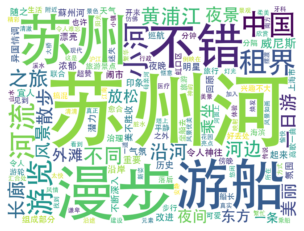

In [ ]:
import os
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import re
import csv

# 停用词文件路径
stopwords_path = '/Users/elsa/Desktop/爬虫学习/0728学习/多语种停用词.txt'

script_dir = os.getcwd()
txt_path = os.path.join(script_dir, '/Users/elsa/Desktop/爬虫学习/0728学习/苏州河标题和内容_标题.txt')
wordcloud_path = os.path.join(script_dir, 'wordcloud.png') ##将词云保存在当前工作目录

# 读取停用词
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set(line.strip() for line in f if line.strip())

# 读取文本
with open(txt_path, 'r', encoding='utf-8') as f:
    text = f.read()

def tokenize_text(text):
    try:
        lang = detect(text)
        if lang == 'zh-cn' or lang == 'zh':
            return ' '.join(jieba.cut(text))
        else:
            return text
    except:
        return text

text = re.sub(r'\d+', '', text)

# 分词并过滤停用词
words = jieba.cut(text)
filtered_words = [w for w in words if w.strip() and w not in stopwords and len(w) > 1] ##原理：w是切割后的词且不是废词
filtered_words = [w.lower() if w.isalpha() else w for w in filtered_words]

# 归一化词语，把“实践区”和“世博”都替换成“城市最佳实践区”
normalized_words = [
    '城市最佳实践区' if w in ['实践区', '世博'] else w
    for w in filtered_words
]

# 词频统计
word_counts = Counter(filtered_words)

mask_img = np.array(Image.open('/Users/elsa/Desktop/爬虫学习/mask.png'))

# 打印词频最高的100个词
print('词频最高的100个词:')
top_words = word_counts.most_common(100)
# 如果是要全部的词语的词频：top_words = word_counts.most_common()
for word, freq in top_words:
    print(f'{word}: {freq}')

csv_output_path = os.path.join(script_dir, '中文苏州河top100_words.csv')
with open(csv_output_path, 'w', encoding='utf-8', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['词语', '词频'])
    writer.writerows(top_words)

print(f'✅ 词频最高的100个词已写入: {csv_output_path}')

## 生成词云

In [ ]:
# 生成词云，直接用词频字典
wc = WordCloud(
    font_path='/System/Library/Fonts/STHeiti Medium.ttc',
    background_color='white',
    width=800,
    height=600,
    max_words=200,
    #mask = mask_img
)

wc.generate_from_frequencies(word_counts)
wc.to_file(wordcloud_path)
print(f'✅ 词云已保存到: {wordcloud_path}')

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()